In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math,random
np.random.seed(42)

In [2]:
#Read data
trainData = np.loadtxt('./data_lab2/ballist.dat')
testData = np.loadtxt('./data_lab2/balltest.dat')

train_X = trainData[:,:2]
train_y = trainData[:,2:]

test_X = testData[:,:2]
test_y = testData[:,2:]

In [3]:
train_X[0]

array([ 0.896,  0.54 ])

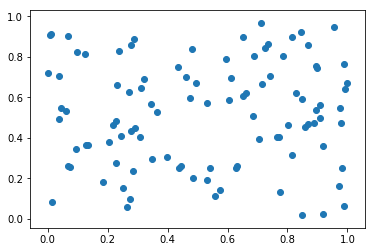

In [4]:
plt.scatter(train_X[:,0],train_X[:,1])
plt.show()

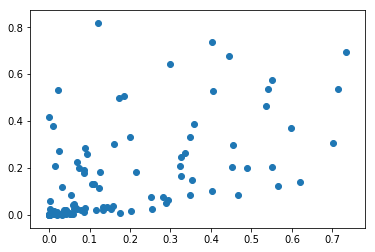

In [5]:
plt.scatter(train_y[:,0],train_y[:,1])
plt.show()

In [12]:
class DeltaRule:
    def __init__(self, train, trainTarget, prototypes, step=0.01, maxEpoch=200):
        self.train = train
        self.trainTarget = trainTarget
        self.prototypes = prototypes
        self.nodes = prototypes.size
        self.step = step
        self.beta = np.ones(self.prototypes.shape) #Variance - now set to equal for all
        #self.beta = setBeta()
        self.weights = np.ones(self.prototypes.shape)
        self.epoch = 0
        self.maxEpoch = maxEpoch
        self.errThreshold = 0.1
        self.mainLoop()
    
    
    def setBeta(self):
        total = 0
        for i in range(self.prototypes.shape[0]-1):
            total += abs(self.prototypes[i] - self.prototypes[i+1])
        averageDistance = total/(self.prototypes.size-1)
        return np.repeat(averageDistance, self.prototypes.size)
        
    def mainLoop(self):
        while self.epoch < self.maxEpoch:
            for j in range(self.train.shape[0]):
                #i next int
                i = random.randint(0,self.train.shape[0]-1) 
                self.weights += self.deltaWeights(i)
                #print(self.weights)
                if self.residualError(self.train, self.trainTarget) < self.errThreshold:
                    return
            self.epoch += 1
            #if self.epoch%20 == 0:
            plt.plot(self.epoch, self.residualError(self.train, self.trainTarget),marker="o", color="b")
        plt.show()
            
            
    def deltaWeights(self, index):
        #a - Kanske upphöjt till två?
        activations = self.activation(self.train[index])
        #a = self.trainTarget[index] - np.dot(activations, self.weights)
        a = self.trainTarget[index] - np.multiply(activations, self.weights)
        #print("A-shape: ",a)
        b = self.step * a
        delta_w = b * self.activation(self.train[index])
        
        return delta_w
    
    def activation(self, pattern): 
        """Gauss simplified e^(-beta(x-mu)^2). Calculates for each row"""
        activations = np.e**(np.multiply(-1*self.beta, (pattern-self.prototypes)**2)) 
        
        #3 vikter ska uppdateras        
        #1a
        bestActivationIndex1 = np.argmax(activations[:,0])
        activations[bestActivationIndex1]=0
        
        #2a
        bestActivationIndex2 = np.argmax(activations[:,1])
        activations[bestActivationIndex2]=0
        
        activations = np.zeros_like(activations)
        activations[bestActivationIndex1]=[1,1]
        activations[bestActivationIndex2]=[1,1]
        
        return activations
    
    def activation_old(self, pattern): 
        """Gauss simplified e^(-beta(x-mu)^2). Calculates for each row"""
        activations = np.e**(np.multiply(-1*self.beta, (pattern-self.prototypes)**2))
        
        #summed_activations np.sum(activations[:,0],activations[:,1])
        #Set biggest activation to 1
        #Endast EN weight ska uppdateras
        bestActivationIndex = np.argmax(activations)
        activations = np.zeros_like(activations)
        activations[bestActivationIndex]=1
        
        return activations
        
    #Predict
    def run(self, patterns):
        res = np.zeros(patterns.shape)
        c = 0
        for x in patterns:
            activations = self.activation(x)
            res[c] = sum(np.multiply(self.weights, activations))
            #print(res[c])
            #print(np.dot(self.weights.T, activations))
            #res[c] = np.dot(self.weights.T, activations)
            c += 1
        return res

    def residualError(self, patterns, targets):
        """Calculates residual error"""
        res = self.run(patterns)
        diff = np.absolute(res-targets)
        return np.average(diff)
    

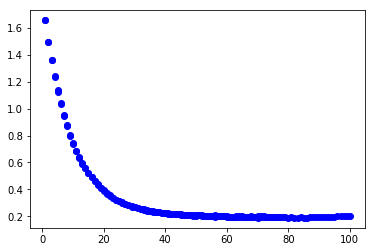

In [9]:
index = np.linspace(0, train_X.shape[0]-1, num = 20, dtype= int)
b = DeltaRule(train_X, train_y,train_X[index], 0.01, 100)

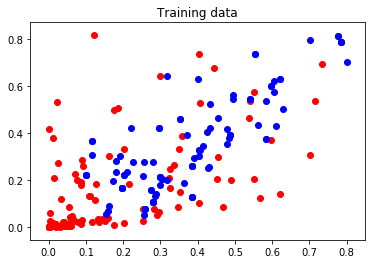

Residual error:  0.200556345401


In [10]:
plt.scatter(train_y[:,0],train_y[:,1],color="r")
plt.scatter(b.run(train_X)[:,0],b.run(train_X)[:,1],color="b")
#plt.scatter(train_X, train_y,color="b")
#plt.plot(train_X[index], train_y[index], "b+")
plt.title("Training data")
plt.show()
print("Residual error: ", b.residualError(train_X, train_y))

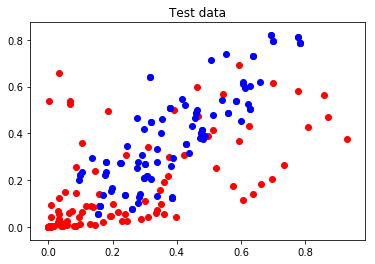

Residual error:  0.219740900091


In [14]:
plt.scatter(test_y[:,0],test_y[:,1],color="r")
plt.scatter(b.run(test_X)[:,0],b.run(test_X)[:,1],color="b")
#plt.scatter(train_X, train_y,color="b")
#plt.plot(train_X[index], train_y[index], "b+")
plt.title("Test data")
plt.show()
print("Residual error: ", b.residualError(test_X, test_y))

In [18]:
print(b.weights)

[[ 0.09675204  0.18129859]
 [ 0.20383049  0.08838692]
 [ 0.25661626  0.28028668]
 [ 0.20914806  0.25697189]
 [ 0.29715775  0.45816222]
 [ 0.07497054  0.01473844]
 [ 0.11491721  0.11266646]
 [ 0.20502799  0.09084601]
 [ 0.22475593  0.16401102]
 [ 0.09470324  0.12172166]
 [ 0.15880563  0.09548147]
 [ 0.07920766  0.03814786]
 [ 0.22423554  0.26613212]
 [ 0.08287436  0.05145015]
 [ 0.40391426  0.3383101 ]
 [ 0.39689539  0.36341617]
 [ 0.1802034   0.0363854 ]
 [ 0.02056207  0.18333845]
 [ 0.20031621  0.23798246]
 [ 0.3807736   0.44871355]]


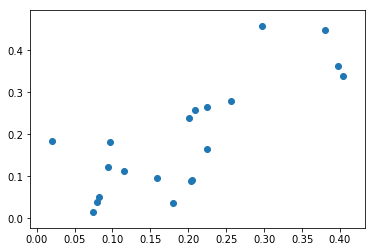

In [16]:
plt.scatter(b.weights[:,0],b.weights[:,1])
plt.show()